In [132]:
import pandas as pd
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento


In [133]:
# 1 e 2
#3 e 4
#5 e 6
#7 ou mais

classes = [0, 2, 4, 6, 100]

In [134]:
quartos = pd.cut(dados['Quartos'], classes)

In [135]:
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [136]:
pd.value_counts(quartos)

(0, 2]      11074
(2, 4]       8094
(4, 6]        470
(6, 100]       36
Name: Quartos, dtype: int64

In [137]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7  quartos ou mais']

In [138]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels)


In [139]:
pd.value_counts(quartos)

1 e 2 quartos         11074
3 e 4 quartos          8094
5 e 6 quartos           470
7  quartos ou mais       36
Name: Quartos, dtype: int64

In [140]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True)

In [141]:
pd.value_counts(quartos)

1 e 2 quartos         11231
3 e 4 quartos          8094
5 e 6 quartos           470
7  quartos ou mais       36
Name: Quartos, dtype: int64

# Relatório de Análise 7
## Identificando e removendo Outiliers

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (10,8))

In [143]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


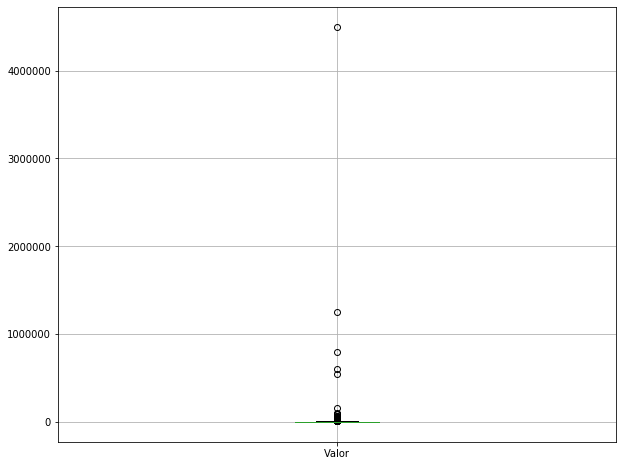

In [144]:
dados.boxplot(['Valor'])

In [145]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [146]:
#criando uma Series p poder manipular melhor
valor = dados['Valor']
type(valor)
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [147]:
Q1 = valor.quantile(.25)
Q1

1600.0

In [148]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [149]:
IIQ = Q3 - Q1 
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [150]:
selecionados = (valor >= limite_inferior) & (valor <= limite_superior)
novos_dados = dados[selecionados]

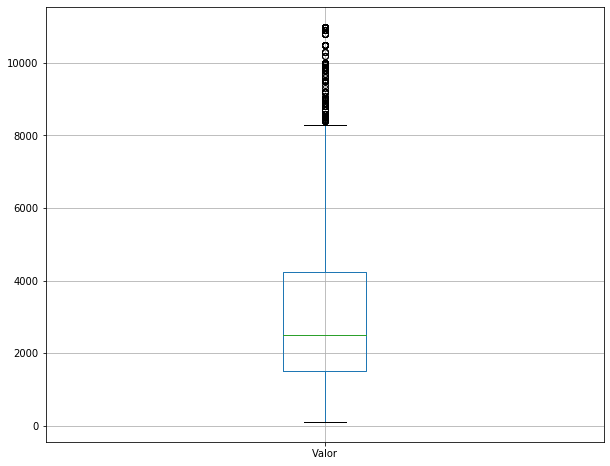

In [151]:
novos_dados.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEA1E0EB48>]],
      dtype=object)

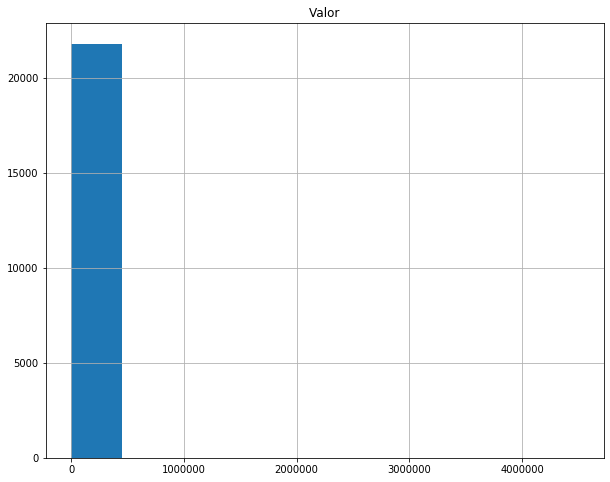

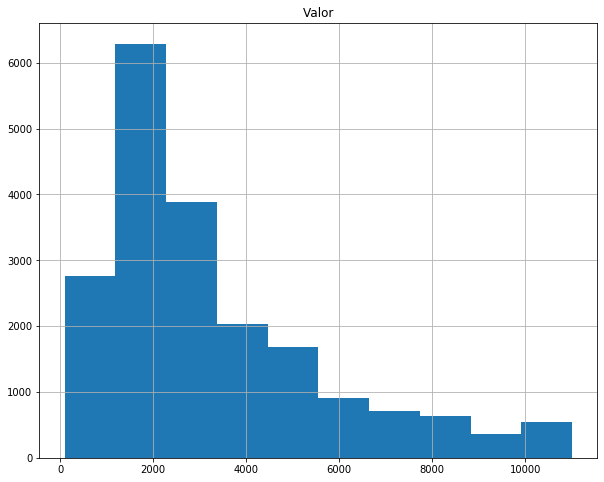

In [152]:
dados.hist(['Valor'])
novos_dados.hist(['Valor'])

In [153]:
amostra = pd.read_csv('aluguel_amostra.csv', sep=';')
amostra

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


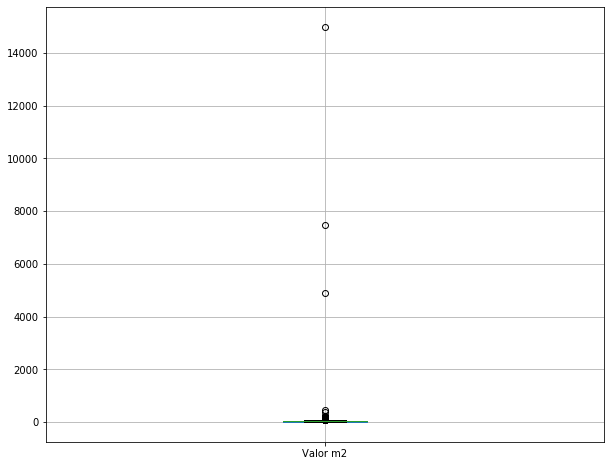

In [154]:
amostra.boxplot(['Valor m2'])

In [155]:
amostra[amostra['Valor m2'] >= 4000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
726,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [156]:
valor_m2 = amostra['Valor m2']
valor_m2

0       10.00
1       13.56
2       51.02
3       55.55
4       18.46
        ...  
9995    96.88
9996    31.58
9997    40.00
9998    34.00
9999     8.33
Name: Valor m2, Length: 10000, dtype: float64

In [157]:
Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IQQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQQ
limite_superior = Q3 + 1.5 * IQQ 


In [158]:
selecao = (valor_m2 >= limite_inferior) & (valor_m2 <= limite_superior)
nova_amostra = amostra[selecionados]

C:\Users\FAEST\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


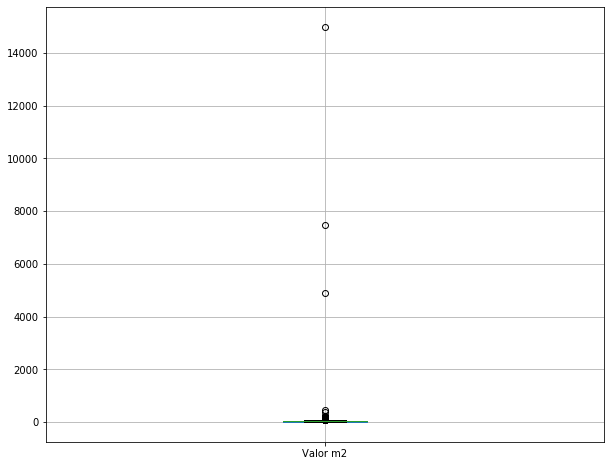

In [159]:
nova_amostra.boxplot(['Valor m2'])

## Identificando e removendo Outliers por grupo

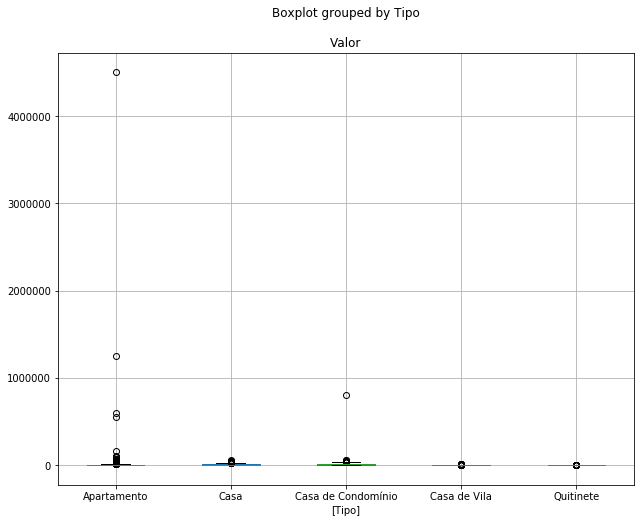

In [160]:
dados.boxplot(['Valor'], by =['Tipo'])

In [161]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [162]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [163]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IQQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQQ
limite_superior = Q3 + 1.5 * IQQ 


In [164]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [165]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [166]:
IQQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [167]:
#selecionador um tipo específico
limite_superior['Apartamento']

9950.0

In [168]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

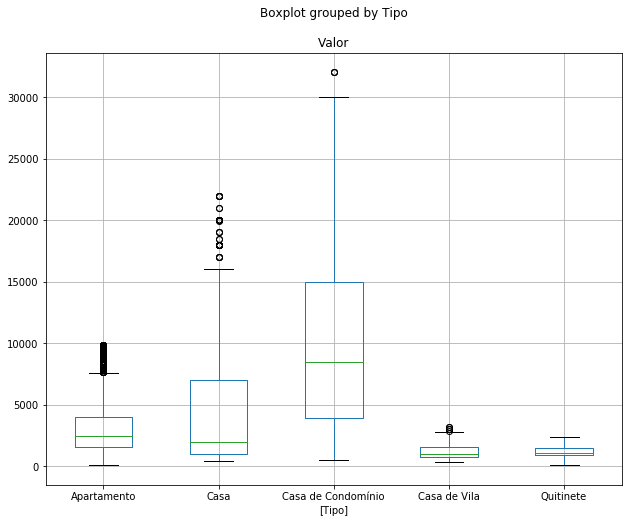

In [169]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [170]:
dados_new.to_csv('aluguel_residencial_sem_outliers', sep=';', index = False)

## Mais sobre gráficos

In [171]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [172]:
area = plt.figure()

<Figure size 720x576 with 0 Axes>

In [173]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [174]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Area')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index=range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor médio por título')

Text(0.5, 1.0, 'Valor médio por título')

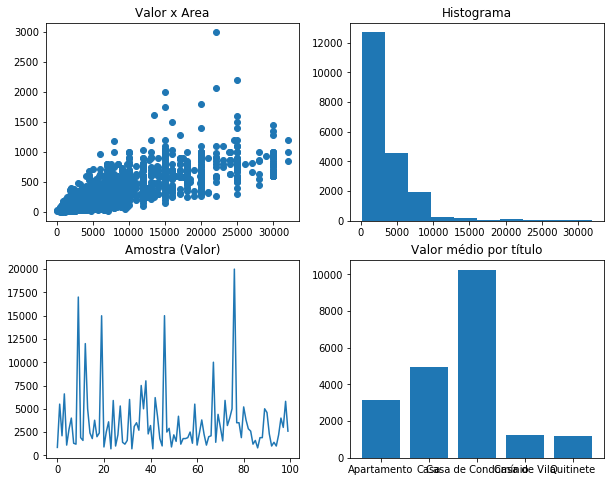

In [175]:
area

In [176]:
area.savefig('gráfico.png', dpi=300, bbox_inches='tight')